In [1]:
!pip install opencv-python-headless

   ---------------------------------------- 0.0/39.4 MB ? eta -:--:--
    --------------------------------------- 0.5/39.4 MB 3.4 MB/s eta 0:00:12
   - -------------------------------------- 1.3/39.4 MB 3.4 MB/s eta 0:00:12
   - -------------------------------------- 1.8/39.4 MB 3.4 MB/s eta 0:00:12
   -- ------------------------------------- 2.6/39.4 MB 3.3 MB/s eta 0:00:12
   --- ------------------------------------ 3.4/39.4 MB 3.3 MB/s eta 0:00:11
   --- ------------------------------------ 3.9/39.4 MB 3.3 MB/s eta 0:00:11
   ---- ----------------------------------- 4.7/39.4 MB 3.3 MB/s eta 0:00:11
   ----- ---------------------------------- 5.2/39.4 MB 3.3 MB/s eta 0:00:11
   ------ --------------------------------- 6.0/39.4 MB 3.3 MB/s eta 0:00:11
   ------- -------------------------------- 7.1/39.4 MB 3.4 MB/s eta 0:00:10
   ------- -------------------------------- 7.9/39.4 MB 3.5 MB/s eta 0:00:09
   --------- ------------------------------ 8.9/39.4 MB 3.6 MB/s eta 0:00:09
   ---

In [2]:
!pip install opencv-python

   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.3/39.5 MB ? eta -:--:--
    --------------------------------------- 0.8/39.5 MB 2.2 MB/s eta 0:00:18
   - -------------------------------------- 1.3/39.5 MB 2.2 MB/s eta 0:00:18
   - -------------------------------------- 1.6/39.5 MB 2.2 MB/s eta 0:00:18
   -- ------------------------------------- 2.1/39.5 MB 2.2 MB/s eta 0:00:18
   -- ------------------------------------- 2.6/39.5 MB 2.2 MB/s eta 0:00:17
   --- ------------------------------------ 3.1/39.5 MB 2.2 MB/s eta 0:00:17
   --- ------------------------------------ 3.4/39.5 MB 2.2 MB/s eta 0:00:17
   --- ------------------------------------ 3.7/39.5 MB 2.0 MB/s eta 0:00:18
   ---- ----------------------------------- 4.7/39.5 MB 2.4 MB/s eta 0:00:15
   ----- ---------------------------------- 5.2/39.5 MB 2.4 MB/s eta 0:00:15
   ----- ---------------------------------- 5.8/39.5 MB 2.3 MB/s eta 0:00:15
   ------ ---

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Baca gambar dan konversi ke RGB & HSV
img = cv2.imread("nama01.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

In [3]:
# Rentang HSV untuk warna merah, hijau, dan biru
color_ranges = {
    "red1": ([0, 100, 100], [10, 255, 255]),
    "red2": ([160, 100, 100], [180, 255, 255]),
    "green": ([40, 100, 100], [80, 255, 255]),
    "blue": ([100, 100, 100], [140, 255, 255])
}

In [4]:
# Fungsi untuk menyoroti teks non-warna (buat jadi hitam, lainnya putih)
def highlight_non_target(mask):
    highlight = np.ones_like(img_rgb) * 255  # putih semua
    background_white_mask = np.all(img_rgb >= [180, 180, 180], axis=-1)
    text_area = np.logical_and(mask == 0, ~background_white_mask)
    highlight[text_area] = [0, 0, 0]  # hitamkan bagian non-warna yang bukan background putih
    return highlight

In [5]:
# Buat mask untuk masing-masing warna
mask_red1 = cv2.inRange(hsv, np.array(color_ranges["red1"][0]), np.array(color_ranges["red1"][1]))
mask_red2 = cv2.inRange(hsv, np.array(color_ranges["red2"][0]), np.array(color_ranges["red2"][1]))
mask_red = cv2.bitwise_or(mask_red1, mask_red2)

mask_green = cv2.inRange(hsv, np.array(color_ranges["green"][0]), np.array(color_ranges["green"][1]))
mask_blue = cv2.inRange(hsv, np.array(color_ranges["blue"][0]), np.array(color_ranges["blue"][1]))

In [6]:
# Buat hasil highlight
highlight_red = highlight_non_target(mask_red)
highlight_green = highlight_non_target(mask_green)
highlight_blue = highlight_non_target(mask_blue)

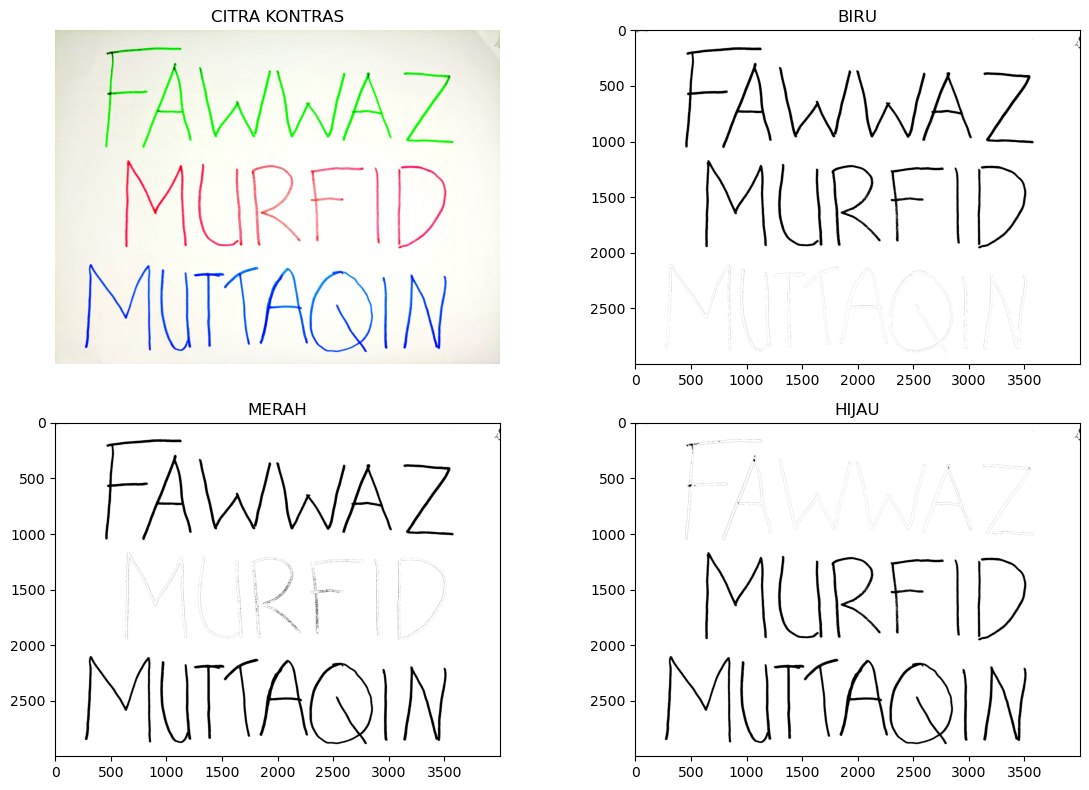

In [7]:
# Tampilkan hasilnya
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(img_rgb)
plt.title("CITRA KONTRAS")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(highlight_blue)
plt.title("BIRU")
plt.axis('on')

plt.subplot(2, 2, 3)
plt.imshow(highlight_red)
plt.title("MERAH")
plt.axis('on')

plt.subplot(2, 2, 4)
plt.imshow(highlight_green)
plt.title("HIJAU")
plt.axis('on')

plt.tight_layout()
plt.show()

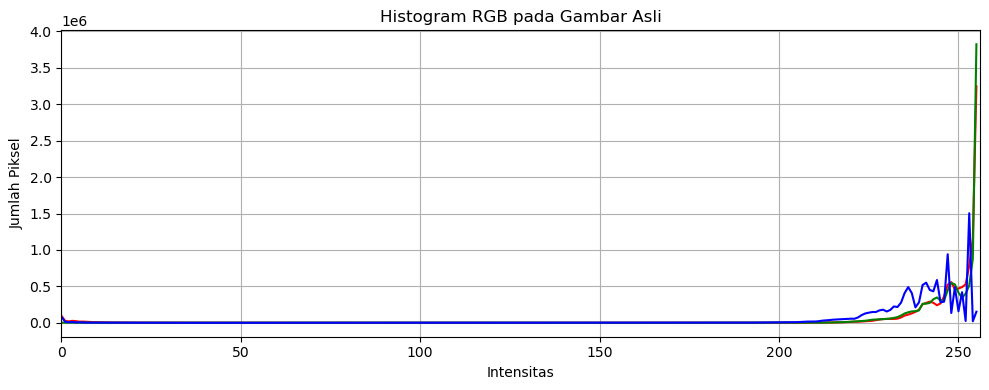

In [8]:
colors = ('r', 'g', 'b')
plt.figure(figsize=(10, 4))
for i, col in enumerate(colors):
    hist = cv2.calcHist([img_rgb], [i], None, [256], [0, 256])
    plt.plot(hist, color=col)
    plt.xlim([0, 256])
plt.title('Histogram RGB pada Gambar Asli')
plt.xlabel('Intensitas')
plt.ylabel('Jumlah Piksel')
plt.grid(True)
plt.tight_layout()
plt.show()

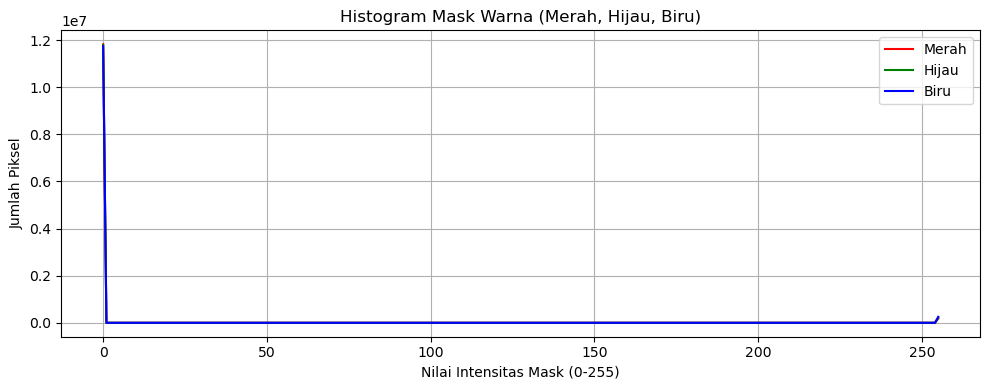

In [9]:
plt.figure(figsize=(10, 4))
plt.plot(cv2.calcHist([mask_red], [0], None, [256], [0, 256]), color='r', label='Merah')
plt.plot(cv2.calcHist([mask_green], [0], None, [256], [0, 256]), color='g', label='Hijau')
plt.plot(cv2.calcHist([mask_blue], [0], None, [256], [0, 256]), color='b', label='Biru')
plt.title('Histogram Mask Warna (Merah, Hijau, Biru)')
plt.xlabel('Nilai Intensitas Mask (0-255)')
plt.ylabel('Jumlah Piksel')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### FAWWAZ MURFID MUTTAQIN PCD B 202331107

In [10]:
# Membaca gambar
image = cv2.imread('nama02.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Mengubah gambar menjadi format RGB
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)  # Mengubah gambar menjadi format HSV

In [11]:
# Fungsi untuk melakukan deteksi warna dengan batas bawah dan atas HSV
def create_color_mask(hsv_img, lower_bound, upper_bound):
    mask = cv2.inRange(hsv_img, lower_bound, upper_bound)  # Membuat mask berdasarkan rentang warna
    masked_result = cv2.bitwise_and(image_rgb, image_rgb, mask=mask)  # Menyaring gambar dengan mask
    grayscale = cv2.cvtColor(masked_result, cv2.COLOR_RGB2GRAY)  # Mengubah gambar yang disaring ke grayscale
    _, binary_image = cv2.threshold(grayscale, 10, 255, cv2.THRESH_BINARY)  # Threshold untuk mendapatkan gambar biner
    return binary_image

In [12]:
# Batasan nilai HSV untuk masing-masing warna
hsv_ranges = {
    'red': (np.array([0, 70, 50]), np.array([10, 255, 255])),
    'green': (np.array([40, 40, 40]), np.array([90, 255, 255])),
    'blue': (np.array([100, 50, 50]), np.array([130, 255, 255]))
}

In [13]:
# Menerapkan fungsi untuk masing-masing warna
blue_mask = create_color_mask(hsv_image, hsv_ranges['blue'][0], hsv_ranges['blue'][1])
red_mask = create_color_mask(hsv_image, hsv_ranges['red'][0], hsv_ranges['red'][1])
green_mask = create_color_mask(hsv_image, hsv_ranges['green'][0], hsv_ranges['green'][1])

In [14]:
# Menggabungkan hasil deteksi warna
combined_red_blue = cv2.bitwise_or(red_mask, blue_mask)  # Gabungkan merah dan biru
full_combined = cv2.bitwise_or(combined_red_blue, green_mask)  # Gabungkan dengan hijau

In [15]:
# Menyiapkan gambar dan judul untuk visualisasi
image_titles = ['NONE', 'BLUE', 'RED-BLUE', 'RED-GREEN-BLUE']
image_outputs = [np.zeros_like(image_rgb[:, :, 0]), blue_mask, combined_red_blue, full_combined]

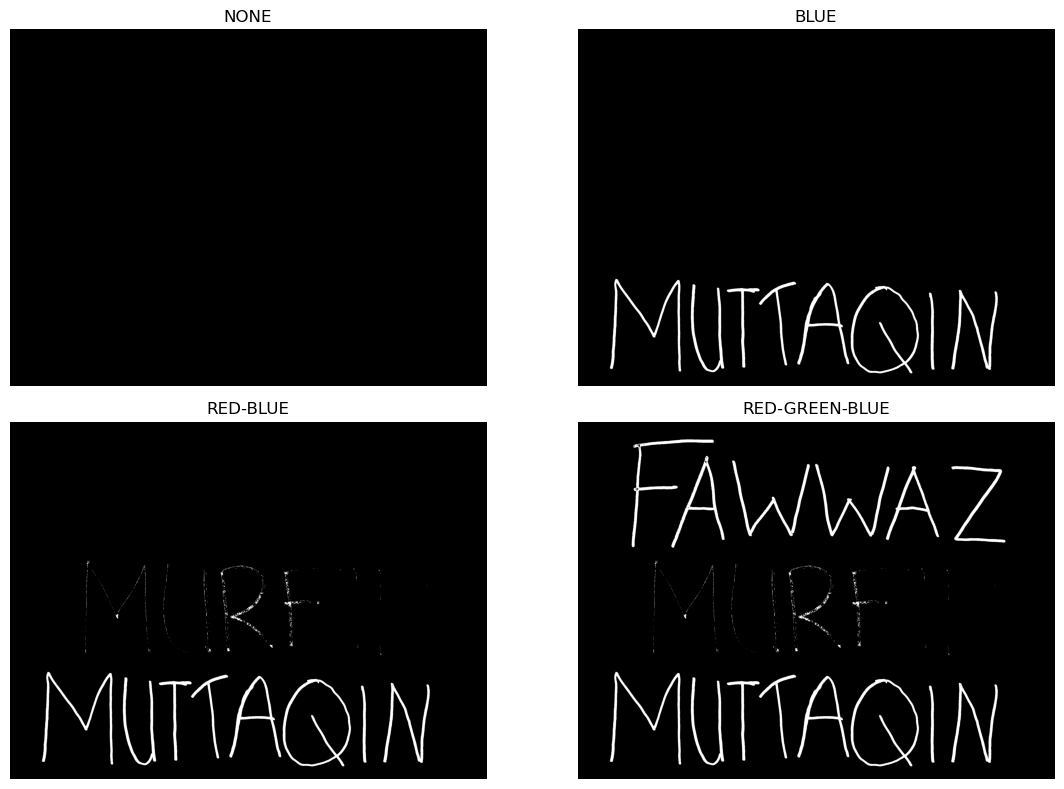

In [16]:
# Visualisasi dengan layout 2x2
plt.figure(figsize=(12, 8))
for idx, (title, img) in enumerate(zip(image_titles, image_outputs)):
    plt.subplot(2, 2, idx + 1)
    plt.imshow(img, cmap='gray')  # Menampilkan gambar dalam grayscale
    plt.title(title)
    plt.axis('off')  # Menonaktifkan axis untuk tampilan yang lebih bersih

plt.tight_layout()
plt.show()

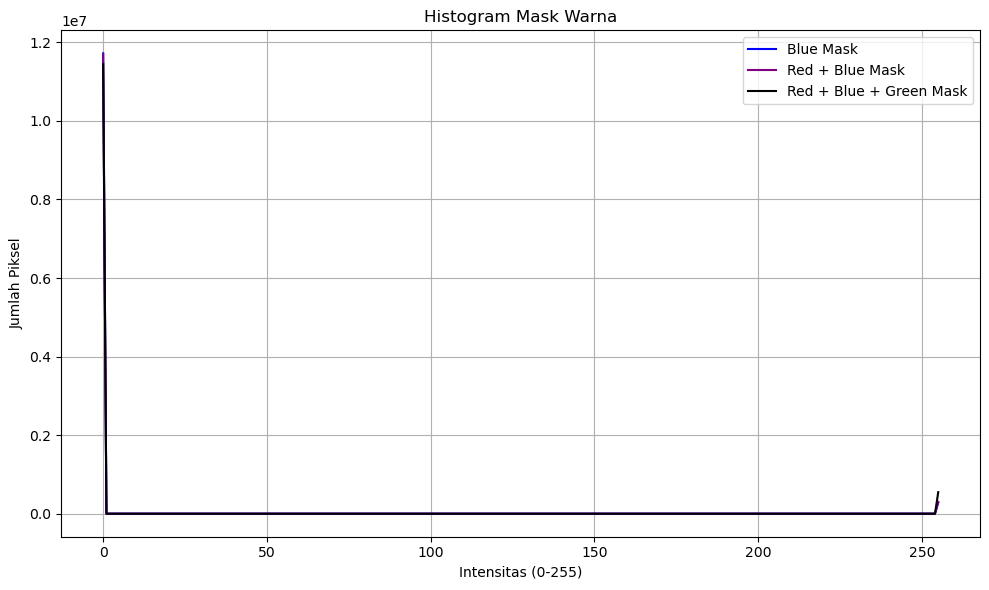

In [17]:
# --- Histogram untuk setiap mask ---
plt.figure(figsize=(10, 6))

# Histogram untuk BLUE
plt.plot(cv2.calcHist([blue_mask], [0], None, [256], [0, 256]), color='blue', label='Blue Mask')

# Histogram untuk RED + BLUE
plt.plot(cv2.calcHist([combined_red_blue], [0], None, [256], [0, 256]), color='purple', label='Red + Blue Mask')

# Histogram untuk RED + GREEN + BLUE
plt.plot(cv2.calcHist([full_combined], [0], None, [256], [0, 256]), color='black', label='Red + Blue + Green Mask')

plt.title('Histogram Mask Warna')
plt.xlabel('Intensitas (0-255)')
plt.ylabel('Jumlah Piksel')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### FAWWAZ MURFID MUTTAQIN 202331107 PCD B

In [18]:
# Load dan konversi gambar
img = cv2.imread('BLACKLIGHT.jpg')  # Ganti dengan nama file kamu
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [19]:
# Fungsi perbaikan kecerahan
def brighten(image, value=50):
    return cv2.add(image, value)

In [20]:
# Fungsi perbaikan kontras
def enhance_contrast(image):
    return cv2.equalizeHist(image)

In [21]:
# Proses perbaikan
bright = brighten(gray)
contrast = enhance_contrast(gray)
bright_contrast = enhance_contrast(bright)

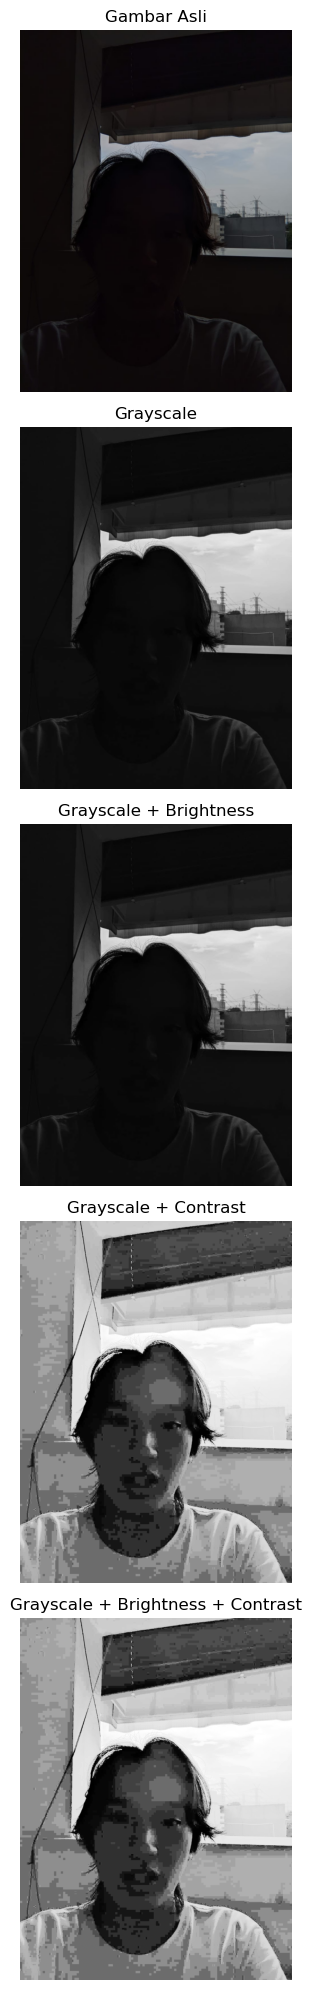

In [22]:
# Visualisasi hasil secara vertikal
images = [img_rgb, gray, bright, contrast, bright_contrast]
titles = [
    'Gambar Asli',
    'Grayscale',
    'Grayscale + Brightness',
    'Grayscale + Contrast',
    'Grayscale + Brightness + Contrast'
]
cmaps = [None, 'gray', 'gray', 'gray', 'gray']

plt.figure(figsize=(6, 20))
for idx, (img_out, title, cmap) in enumerate(zip(images, titles, cmaps), 1):
    plt.subplot(len(images), 1, idx)
    plt.imshow(img_out, cmap=cmap)
    plt.title(title)
    plt.axis('off')

plt.tight_layout()
plt.show()

### FAWWAZ MURFID MUTTAQIN 202331107 PCD B